애플주식 데이터 수집하여 저장하기

In [18]:
!pip install finance-DataReader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import FinanceDataReader as fdr
df=fdr.StockListing('KRX')
print(df.head())

     Code        ISU_CD      Name Market Dept   Close ChangeCode  Changes  \
0  005930  KR7005930003      삼성전자  KOSPI        61300          2     -700   
1  373220  KR7373220003  LG에너지솔루션  KOSPI       511000          1     4000   
2  000660  KR7000660001    SK하이닉스  KOSPI        91000          2    -1700   
3  207940  KR7207940008  삼성바이오로직스  KOSPI       783000          2    -6000   
4  051910  KR7051910008      LG화학  KOSPI       669000          1     1000   

   ChagesRatio    Open    High     Low    Volume        Amount  \
0        -1.13   62300   62600   61300  10308143  638634052687   
1         0.79  508000  522000  507000    239646  123155230000   
2        -1.83   93500   94000   91000   2496352  230723303704   
3        -0.76  789000  790000  781000     39167   30725679000   
4         0.15  668000  686000  666000    145162   97814598000   

            Marcap      Stocks MarketId  
0  365947670315000  5969782550      STK  
1  119574000000000   234000000      STK  
2   6624821521

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

# 애플 주식 데이터 수집
df = fdr.DataReader('AAPL','2022')

# 데이터 확인
print(df.head())
print(df.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  180.683853   
2022-01-04  182.630005  182.940002  179.119995  179.699997  178.390686   
2022-01-05  179.610001  180.169998  174.639999  174.919998  173.645538   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.746796   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.915573   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-17  152.350006  153.000000  150.850006  152.550003  152.550003   
2023-02-21  150.199997  151.300003  148.410004  148.479996  148.479996   
2023-02-22  148.8

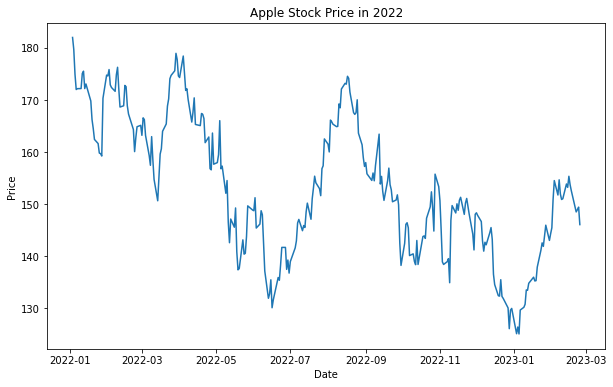

In [33]:
# 주식 가격 시각화하기
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y=df['Close'])
plt.title('Apple Stock Price in 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [36]:
#한달 간격으로 다운샘플링
df_month=df.resample("BM").mean()
print(df_month.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-31  170.201500  172.447999  167.639500  169.861500  168.623887   
2022-02-28  169.635262  171.585263  167.580524  169.830001  168.772580   
2022-03-31  164.806956  167.164348  162.939131  165.310435  164.315065   
2022-04-29  167.479001  169.518500  165.083002  166.820999  165.816531   
2022-05-31  148.324286  150.950952  145.364284  148.430477  147.708989   

                  Volume  
Date                      
2022-01-31  1.054223e+08  
2022-02-28  8.565875e+07  
2022-03-31  9.481740e+07  
2022-04-29  8.438978e+07  
2022-05-31  1.143353e+08  


In [37]:
#수익률 추가하기
df_month['rtn']=df_month['Close'].pct_change()
print(df_month.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-31  170.201500  172.447999  167.639500  169.861500  168.623887   
2022-02-28  169.635262  171.585263  167.580524  169.830001  168.772580   
2022-03-31  164.806956  167.164348  162.939131  165.310435  164.315065   
2022-04-29  167.479001  169.518500  165.083002  166.820999  165.816531   
2022-05-31  148.324286  150.950952  145.364284  148.430477  147.708989   

                  Volume       rtn  
Date                                
2022-01-31  1.054223e+08       NaN  
2022-02-28  8.565875e+07 -0.000185  
2022-03-31  9.481740e+07 -0.026612  
2022-04-29  8.438978e+07  0.009138  
2022-05-31  1.143353e+08 -0.110241  


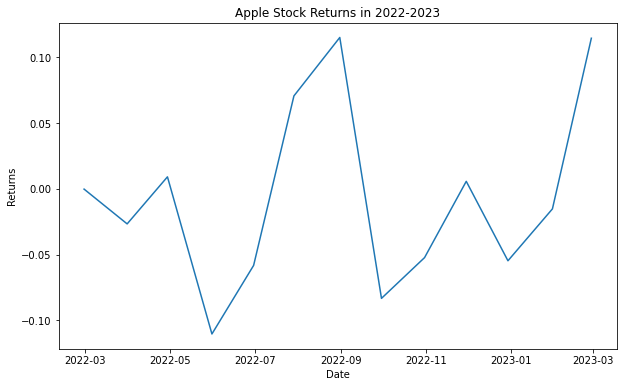

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_month.index, y=df_month['rtn'])
plt.title('Apple Stock Returns in 2022-2023')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()


In [43]:
df_month['MA']=df_month['Close'].rolling(2).mean()
print(df_month.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-31  170.201500  172.447999  167.639500  169.861500  168.623887   
2022-02-28  169.635262  171.585263  167.580524  169.830001  168.772580   
2022-03-31  164.806956  167.164348  162.939131  165.310435  164.315065   
2022-04-29  167.479001  169.518500  165.083002  166.820999  165.816531   
2022-05-31  148.324286  150.950952  145.364284  148.430477  147.708989   

                  Volume       rtn          MA  
Date                                            
2022-01-31  1.054223e+08       NaN         NaN  
2022-02-28  8.565875e+07 -0.000185  169.845750  
2022-03-31  9.481740e+07 -0.026612  167.570218  
2022-04-29  8.438978e+07  0.009138  166.065717  
2022-05-31  1.143353e+08 -0.110241  157.625738  


<AxesSubplot:xlabel='Date'>

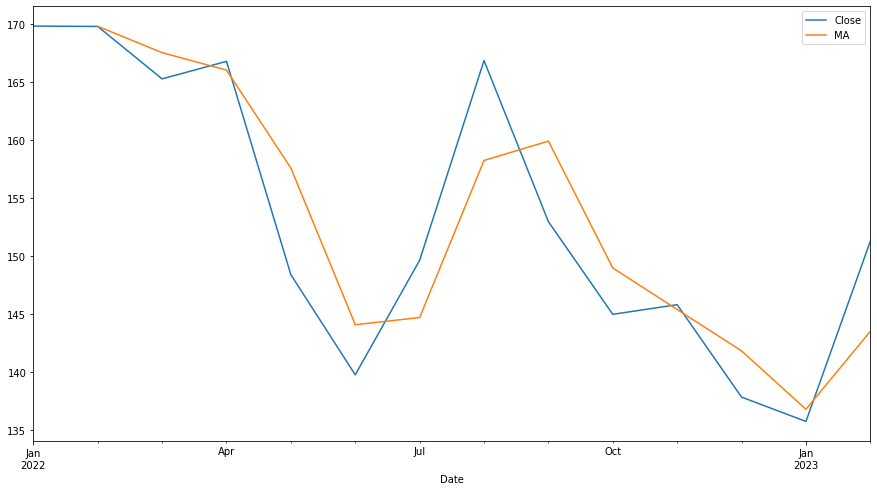

In [44]:
df_month.iloc[:,[3,7]].plot(figsize=(15,8))

In [45]:
last_close=df_month['MA'].iloc[-2] # 이동평균선 60일 전 종가
print(last_close)
price=df_month['Close'].iloc[-1] # 오늘 종가
print(price)
if price>last_close:
    print('상승 장')
elif price<last_close:
    print('하락 장')
else:
    print('변화없음')

136.8278330345238
151.31764588235296
상승 장


In [48]:
df_month.to_csv('apple_data.csv')